# Conditional Graph Exercise 🚧

In [7]:
from typing import TypedDict, Literal
from langgraph.graph.state import StateGraph

In [22]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    final_number1: int
    number3: int
    operation2: str
    number4: int
    final_number2: int

In [50]:
def adder1(state: AgentState) -> AgentState:
    state['final_number1'] = state['number1'] + state['number2']
    return state

def subber1(state: AgentState) -> AgentState:
    state['final_number1'] = state['number1'] - state['number2']
    return state

def adder2(state: AgentState) -> AgentState:
    state["final_number2"] = (
        state["number3"] + state["number4"] + state["final_number1"]
    )
    return state

def subber2(state: AgentState) -> AgentState:
    state["final_number2"] = (
        state["number3"] - state["number4"] + state["final_number1"]
    )
    return state


def decide_next_1(state: AgentState) -> AgentState:
    if state["operation1"] == "+":
        return "addition_operation1"
    else:
        return "subtraction_operation1"

def decide_next_2(state: AgentState) -> AgentState:
    if state["operation2"] == "+":
        return "addition_operation2"
    else:
        return "subtraction_operation2"

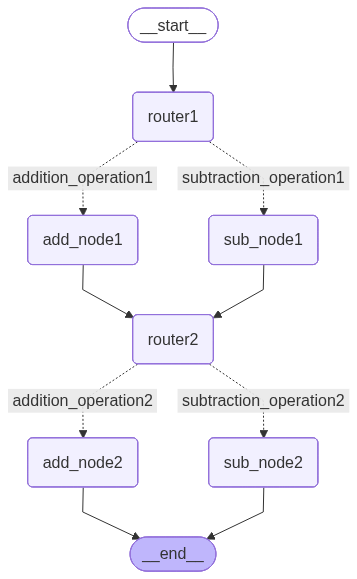

In [51]:
graph = StateGraph(AgentState)

graph.add_node('add_node1', adder1)
graph.add_node('add_node2', adder2)
graph.add_node('sub_node1', subber1)
graph.add_node('sub_node2', subber2)
graph.add_node('router1', lambda state: state)
graph.add_node('router2', lambda state: state)

graph.set_entry_point('router1')
graph.add_conditional_edges(
    'router1',
    decide_next_1,
    {
        'addition_operation1': 'add_node1',
        'subtraction_operation1': 'sub_node1'
    }
)

graph.add_edge('add_node1', 'router2')
graph.add_edge('sub_node1', 'router2')
graph.add_conditional_edges(
    'router2',
    decide_next_2,
    {
        'addition_operation2': 'add_node2',
        'subtraction_operation2': 'sub_node2'
    }
)


graph.set_finish_point('add_node2')
graph.set_finish_point('sub_node2')

app = graph.compile()
app


In [53]:
init_state1 = AgentState(number1 = 1, operation1='+', number2=3, number3=3, operation2='+', number4=2)
print(app.invoke(init_state1))

{'number1': 1, 'operation1': '+', 'number2': 3, 'final_number1': 4, 'number3': 3, 'operation2': '+', 'number4': 2, 'final_number2': 9}
